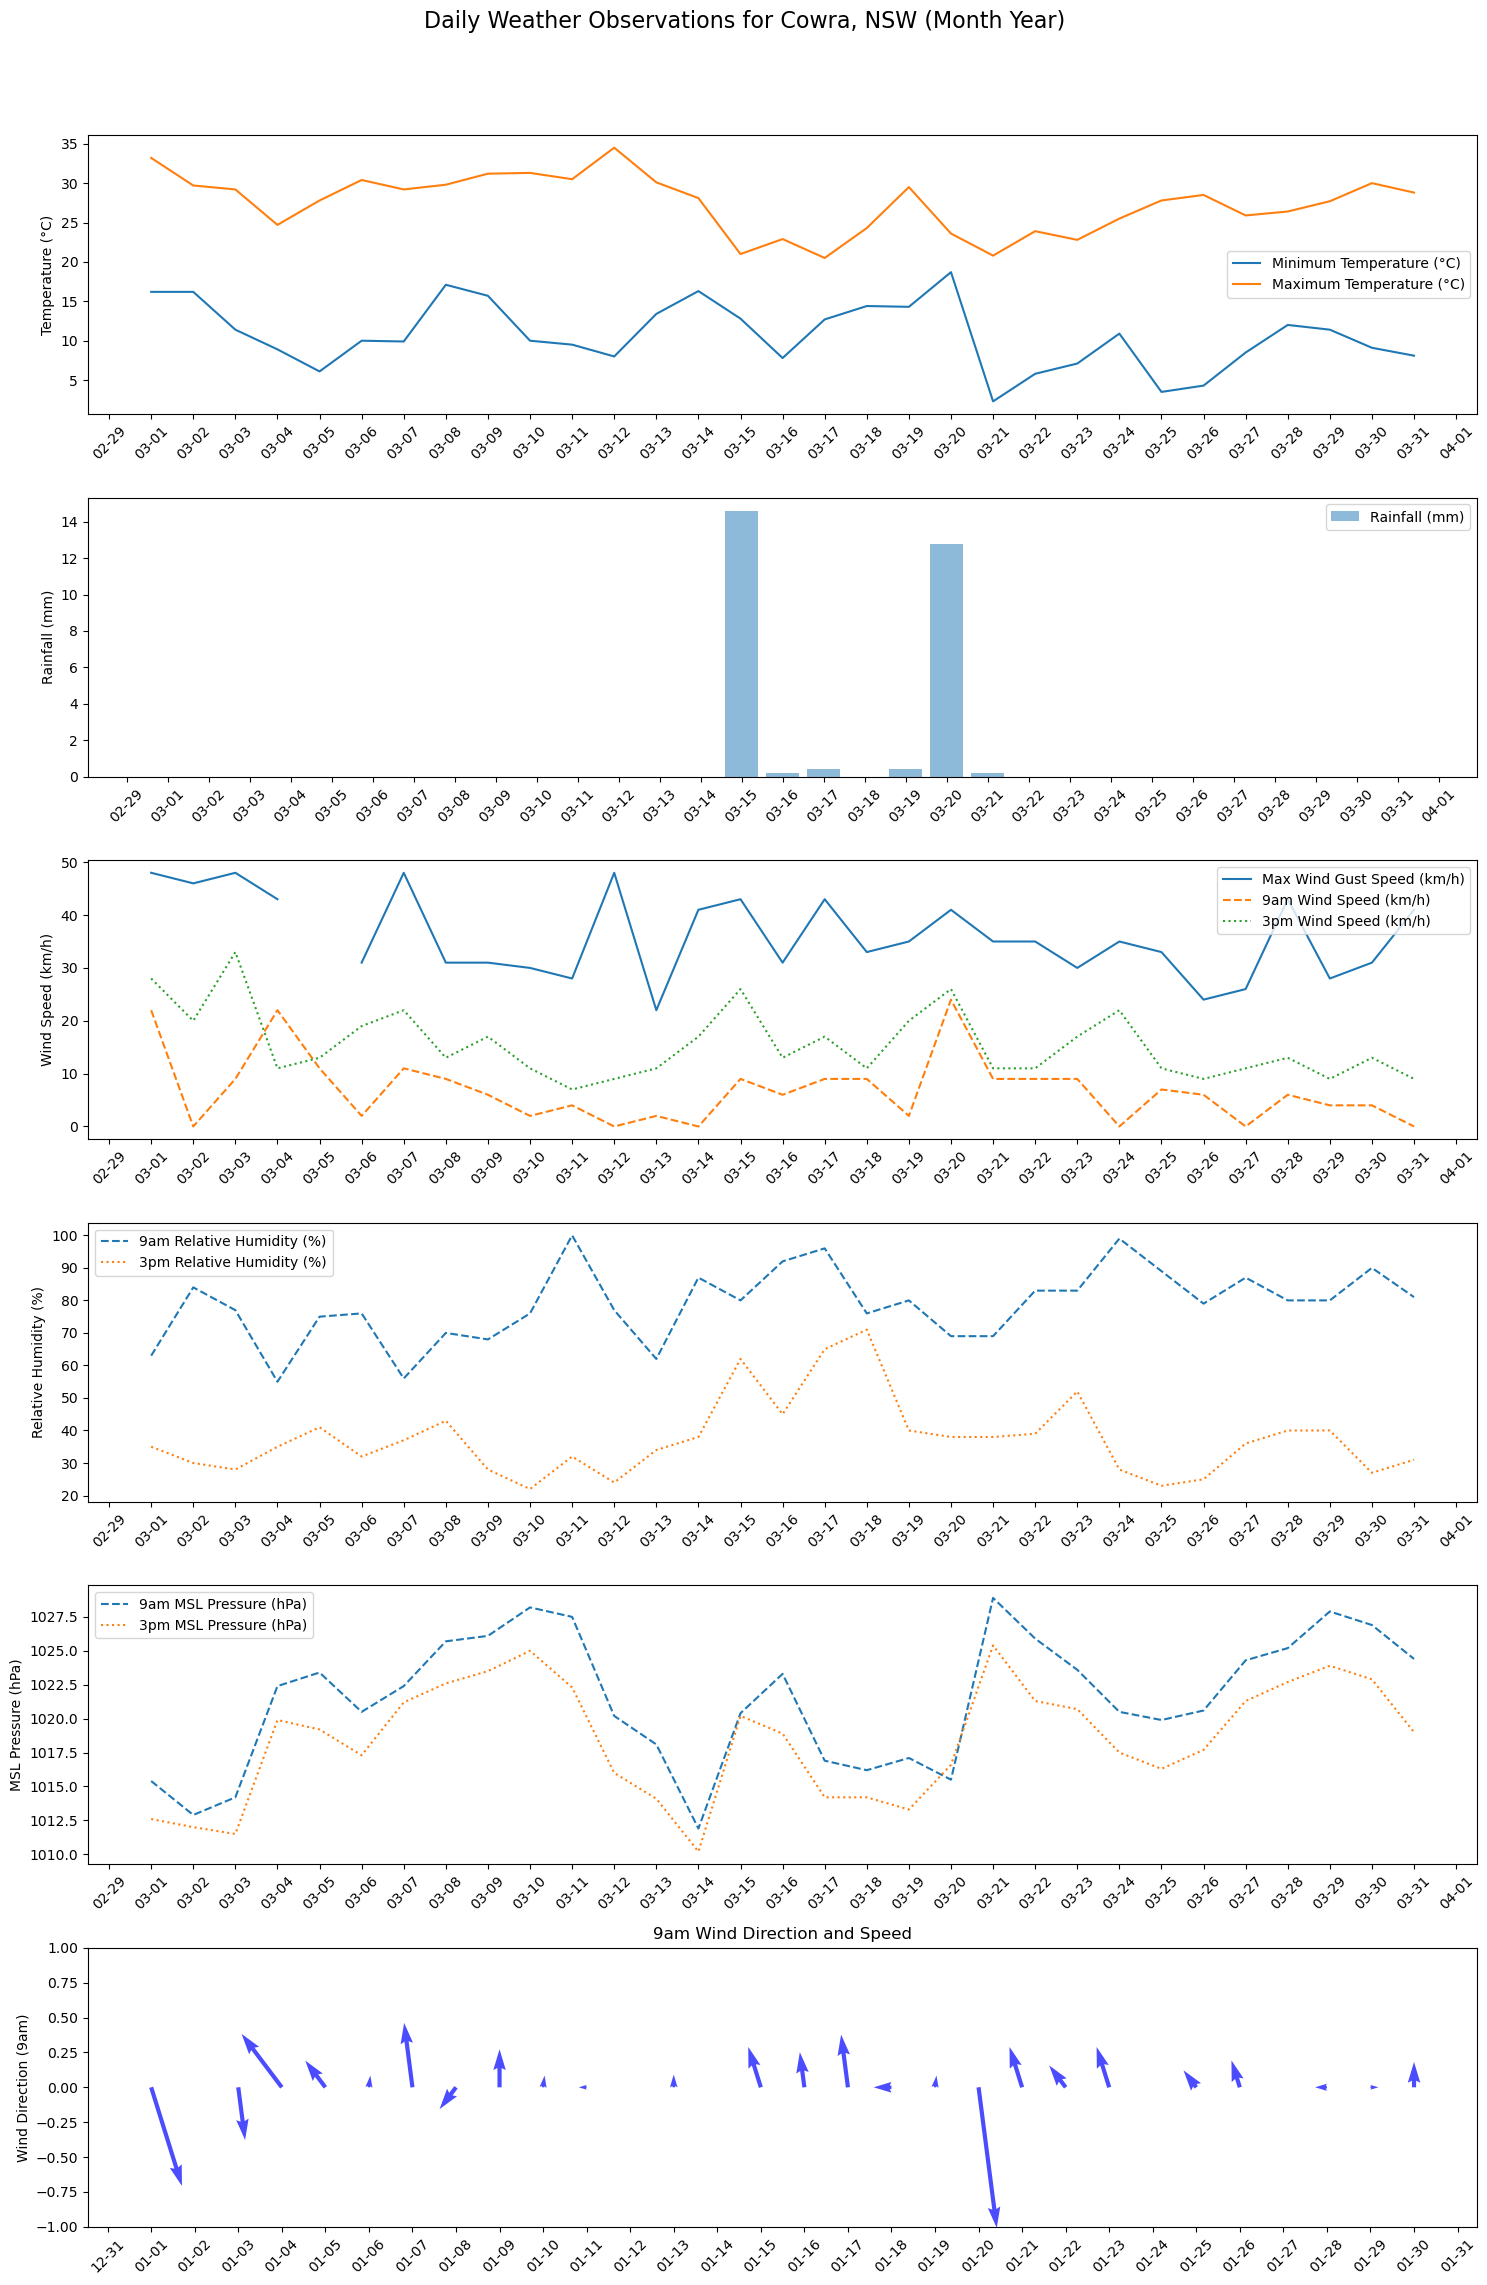

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Set scaling factor for wind arrows
scaling_factor = 22

# Cardinal direction mapping to approximate degree angles
direction_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Define the function with a parameter for file path
def preprocess_data(file_path):
    # Load data and convert dates
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data.set_index('Date', inplace=True)
    
    # Replace 'Calm' with 0 in wind speed columns and map cardinal directions to angles
    data.replace('Calm', 0, inplace=True)
    data['9am wind angle'] = data['9am wind direction'].map(direction_map)
    for column in ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
                   'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)',
                   '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)',
                   '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']:
        if column in data.columns:
            data[column] = pd.to_numeric(data[column], errors='coerce')
    return data

def plot_weather_data(data, title):
    plt.figure(figsize=(15, 24))
    
    # Determine temperature column names
    min_temp_col = 'Minimum temperature (°C)' if 'Minimum temperature (°C)' in data.columns else 'Minimum temperature (C)'
    max_temp_col = 'Maximum temperature (°C)' if 'Maximum temperature (°C)' in data.columns else 'Maximum temperature (C)'

    # Plot Minimum and Maximum Temperature
    plt.subplot(6, 1, 1)
    plt.plot(data.index, data[min_temp_col], label='Minimum Temperature (°C)')
    plt.plot(data.index, data[max_temp_col], label='Maximum Temperature (°C)')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Plot Rainfall
    plt.subplot(6, 1, 2)
    plt.bar(data.index, data['Rainfall (mm)'], label='Rainfall (mm)', alpha=0.5)
    plt.ylabel('Rainfall (mm)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Plot Wind Speeds at 9am and 3pm
    plt.subplot(6, 1, 3)
    plt.plot(data.index, data['Speed of maximum wind gust (km/h)'], label='Max Wind Gust Speed (km/h)')
    plt.plot(data.index, data['9am wind speed (km/h)'], label='9am Wind Speed (km/h)', linestyle='--')
    plt.plot(data.index, data['3pm wind speed (km/h)'], label='3pm Wind Speed (km/h)', linestyle=':')
    plt.ylabel('Wind Speed (km/h)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Plot Relative Humidity
    plt.subplot(6, 1, 4)
    plt.plot(data.index, data['9am relative humidity (%)'], label='9am Relative Humidity (%)', linestyle='--')
    plt.plot(data.index, data['3pm relative humidity (%)'], label='3pm Relative Humidity (%)', linestyle=':')
    plt.ylabel('Relative Humidity (%)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Plot MSL Pressure at 9am and 3pm
    plt.subplot(6, 1, 5)
    plt.plot(data.index, data['9am MSL pressure (hPa)'], label='9am MSL Pressure (hPa)', linestyle='--')
    plt.plot(data.index, data['3pm MSL pressure (hPa)'], label='3pm MSL Pressure (hPa)', linestyle=':')
    plt.ylabel('MSL Pressure (hPa)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Plot 9am Wind Direction and Speed
    plt.subplot(6, 1, 6)
    for i, (angle, speed) in enumerate(zip(data['9am wind angle'], data['9am wind speed (km/h)'])):
        if np.isnan(angle) or np.isnan(speed):
            continue
        dx = np.cos(np.radians(angle)) * speed / scaling_factor
        dy = np.sin(np.radians(angle)) * speed / scaling_factor
        plt.quiver(i, 0, dx, dy, angles='xy', scale_units='xy', scale=1, width=0.003, color='blue', alpha=0.7)
    
    plt.title('9am Wind Direction and Speed')
    plt.ylabel('Wind Direction (9am)')
    plt.xticks(range(len(data.index)), data.index.strftime('%m-%d'), rotation=45)
    plt.ylim(-1, 1)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage:
file_path = '../data/IDCJDW2801.202403.csv'
data = preprocess_data(file_path)
plot_weather_data(data, 'Daily Weather Observations for Cowra, NSW (Month Year)')